In [1]:
# Задача - сгруппировать покемонов по виду и показать некоторые свойства, присущие этому виду
# Беру понятные показатели: средний рост, средний вес, средний показатель счастья и количество детей в виде

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pokemon = pd.read_csv('data/pokemon.csv')

In [3]:
# Смотрю, что вообще за набор я получил

pokemon.head()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


In [4]:
# Чтобы было понятнее -- какие есть колонки

pokemon.columns

Index(['id', 'identifier', 'name', 'name_phonetic', 'species', 'name_jp',
       'name_jp_romaji', 'species_jp', 'generation_id', 'ndex', 'kdex', 'jdex',
       'jdex_old', 'hdex', 'sdex', 'udex', 'type1_id', 'type2_id',
       'ability1_id', 'ability2_id', 'abilitydream_id',
       'evolution_parent_pokemon_id', 'evolution_method_id',
       'evolution_parameter', 'height', 'weight', 'gender_rate', 'catch_rate',
       'exp_yield', 'base_happiness', 'egg_group1_id', 'egg_group2_id',
       'is_baby', 'baby_breed_item_id', 'hatch_counter', 'lvl_100_exp',
       'pokemon_order', 'legacy_id'],
      dtype='object')

In [5]:
# Получаю виды и очищаю их от повторов 

species = pokemon['species']
species = species.drop_duplicates()
species = species.reset_index(drop=True)
species

0               Seed
1             Lizard
2              Flame
3        Tiny Turtle
4             Turtle
5          Shellfish
6               Worm
7             Cocoon
8          Butterfly
9          Hairy Bug
10        Poison Bee
11         Tiny Bird
12              Bird
13             Mouse
14              Beak
15             Snake
16             Cobra
17        Poison Pin
18             Drill
19             Fairy
20               Fox
21           Balloon
22               Bat
23              Weed
24            Flower
25          Mushroom
26            Insect
27       Poison Moth
28              Mole
29       Scratch Cat
           ...      
445         Freezing
446    Crystallizing
447            Snail
448        Shell Out
449             Trap
450     Martial Arts
451        Automaton
452      Sharp Blade
453      Sword Blade
454     Bash Buffalo
455           Eaglet
456          Valiant
457         Diapered
458     Bone Vulture
459         Anteater
460         Iron Ant
461          

In [6]:
# получаю статистику для каждого вида

specGroups = pokemon.groupby('species').agg({'height':'mean', 
'weight':'mean', 
'catch_rate':'mean', 
'base_happiness':'mean', 
'is_baby':'sum'})

specGroups

,height,weight,catch_rate,base_happiness,is_baby
species,,,,,
Abundance,15.000000,680.000000,3.000000,90.000000,0
Acorn,5.000000,40.000000,255.000000,70.000000,0
Alpha,32.000000,3200.000000,3.000000,0.000000,0
Angler,5.000000,120.000000,190.000000,70.000000,0
Ant Pit,7.000000,150.000000,255.000000,70.000000,0
Anteater,14.000000,580.000000,90.000000,70.000000,0
Aqua Mouse,4.000000,85.000000,190.000000,70.000000,0
Aqua Rabbit,8.000000,285.000000,75.000000,70.000000,0
Arm Thrust,23.000000,2538.000000,200.000000,70.000000,0


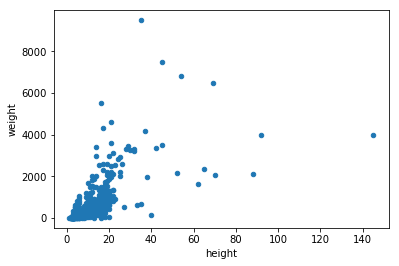

In [7]:
#визуализация: можно посмотреть, как рост покемона зависит от веса

pokemon.plot.scatter(x='height', y='weight');

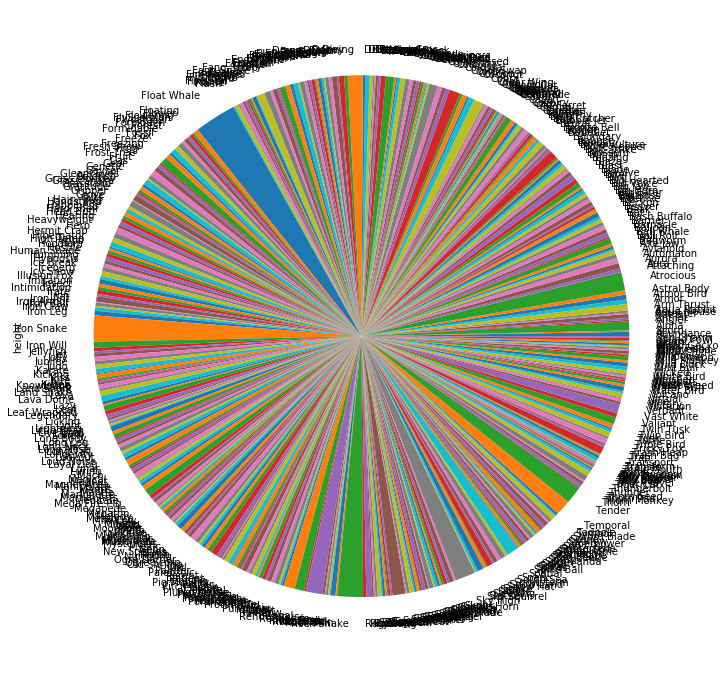

In [8]:
#сравним средний рост покемонов
from pandas.tools.plotting import bootstrap_plot

series = pd.Series(specGroups['height'])
series.plot.pie(figsize=(12, 12))

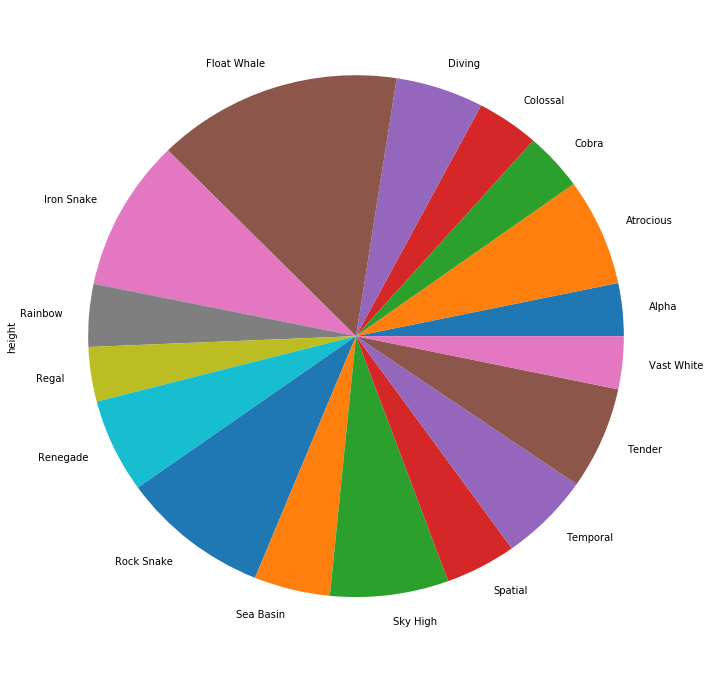

In [9]:
# можно очистить данные, оставив только самых высоких
specGroupsMax = specGroups[specGroups.height > 30]

series = pd.Series(specGroupsMax['height'])
series.plot.pie(figsize=(12, 12))